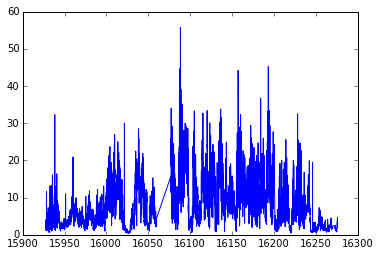

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4

obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

nc = netCDF4.Dataset(obsfile, 'r')

station = 12
depth = -1.0
varid = 10

obs_station = nc.variables['obs_station'][:]
obs_depth = nc.variables['obs_depth'][:]
obs_type = nc.variables['obs_type'][:]
index = np.where((obs_station==station) & (obs_depth==depth) & (obs_type==varid))[0]

obs_time = nc.variables['obs_time'][index]
obs_value = nc.variables['obs_value'][index]
plt.plot(obs_time, obs_value)

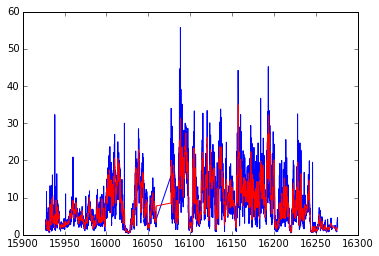

In [35]:
period = np.arange(6,len(obs_time)-6)
h = [np.mean(obs_value[i-6:i+6]) for i in period]
plt.plot(obs_time, obs_value, 'b-')
plt.plot(obs_time[period], h, 'r-')

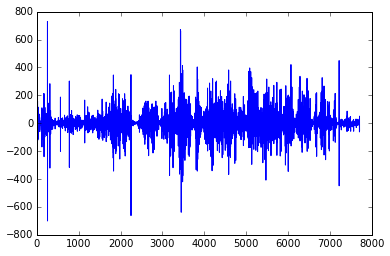

In [17]:
delta = lambda x: [x[i+1] - x[i] for i in range(len(x)-1)]
d_time = delta(obs_time)
d_value = delta(obs_value)
g = [d_value[i] / d_time[i] for i in range(len(d_time))]
plt.plot(g)

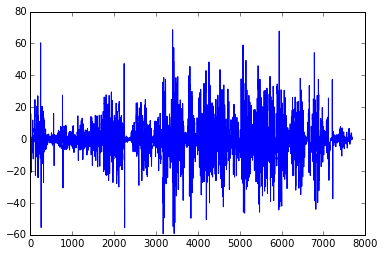

In [26]:
h = [np.mean(g[i:i+12]) for i in range(len(g)-25)]
plt.plot(h)

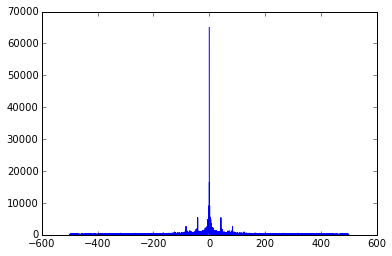

In [44]:
fs = 1000.0
d = 1.0 / fs

fft = np.fft.fft(obs_value)
size = len(obs_value)
freq = np.fft.fftfreq(size,d)
plt.plot(freq, abs(fft))

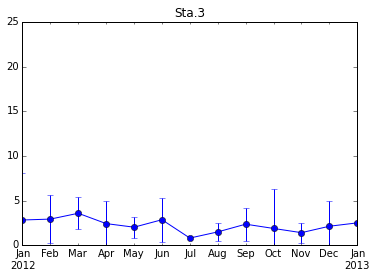

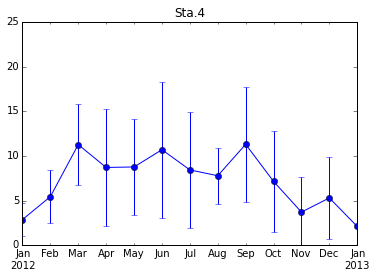

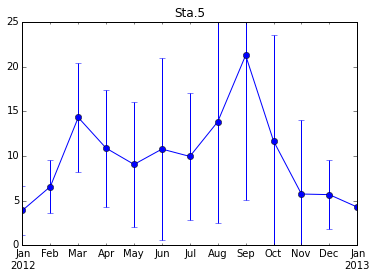

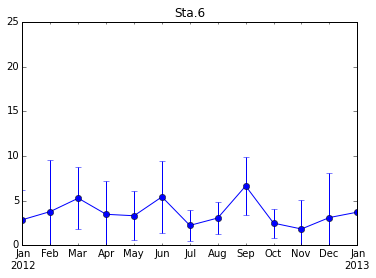

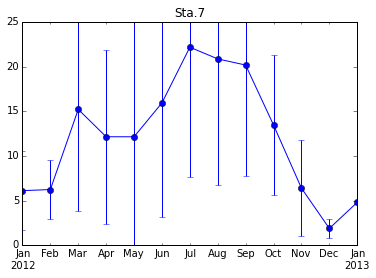

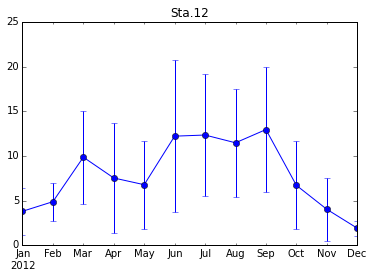

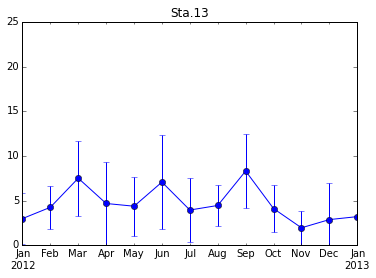

In [91]:
%matplotlib inline

import pandas as pd
import netCDF4
import romspy
import matplotlib.pyplot as plt
import numpy as np
import netCDF4

obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

nc = netCDF4.Dataset(obsfile, 'r')
obs_station = nc.variables['obs_station'][:]
obs_depth = nc.variables['obs_depth'][:]
obs_type = nc.variables['obs_type'][:]

def mean_plot(station, depth, varid):
    
    index = np.where((obs_station==station) & (obs_depth==depth) & (obs_type==varid))[0]

    obs_time = nc.variables['obs_time'][index]
    obs_value = nc.variables['obs_value'][index]
    
    obs_time2 = netCDF4.num2date(obs_time, romspy.JST_days)
    s = pd.Series(obs_value, index=obs_time2)
    period = 'M'
    mean = s.resample(period, how='mean')
    std = s.resample(period, how='std')
    mean.plot(yerr=std, fmt='o-')
    plt.ylim(ymin=0, ymax=25)

depth=-1.0
varid=10
for i in [3,4,5,6,7,12,13]:
    if i == 5: 
        mean_plot(i, -0.7, varid)
    else: 
        mean_plot(i, depth, varid)
    plt.title('Sta.{}'.format(i))
    plt.show()